[View in Colaboratory](https://colab.research.google.com/github/ashwin19091990/deeplarning/blob/master/Mnist.ipynb)

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import math

In [3]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

Instructions for updating:
Please use tf.data.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-u

In [10]:
train_data = mnist.train.images
# train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
# test_data = mnist.test.images
# test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
x=np.asarray(mnist.train.labels,dtype=np.int32)
type(train_data)
train_label=mnist.train.labels
print(type(x),type(train_data))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
def oneHotEncoding(Y):
    #Y=np.array(Y.T)
    Y=np.array(Y.T).astype(int)
    max_Y=np.amax(Y)
    print(max_Y,'maximum value of max_Y')
    print(np.amin(Y),'minimum value of Y')
    size=Y.shape[0]
    a=np.zeros((size, max_Y+1))
    print(a.shape,'a shape\n',size,'size')
    print(np.arange(size)[-1],'\t',Y.shape)
    a[np.arange(size),Y]=1
    return a

In [5]:
# Y = oneHotEncoding(test_labels)

9 maximum value of max_Y
0 minimum value of Y
(10000, 10) a shape
 10000 size
9999 	 (10000,)


In [0]:
# input_layers = tf.reshape(test_data,[-1,28,28,1])
# Z1 = tf.layers.conv2d(inputs=input_layers,filters=45,kernel_size=[5,5],padding="same",activation=tf.nn.relu)
# pool1 = tf.layers.max_pooling2d(inputs=Z1, pool_size=[2, 2], strides=2)
# conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
# pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
# P2 = tf.reshape(pool2, [-1, 7 * 7 * 64])
# Z3 = tf.contrib.layers.fully_connected(P2, 10,activation_fn=None)
# Y = tf.one_hot(indices=tf.cast(test_labels, tf.int32), depth=10)
# #loss = tf.losses.softmax_cross_entropy(onehot_labels=Y, logits=Z3)
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))

In [0]:
# with tf.Session() as sess_test:
#   init = tf.global_variables_initializer()
#   sess_test.run(init)
#   a = sess_test.run(loss)

In [0]:
# print(a)

In [0]:
# test_labels[0]

In [0]:
class CNNTest:
  
  def datasetPreparataion(self):
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    test_data = mnist.test.images
    test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    train_label_one_hot = self.oneHotEncoding(train_labels)
    test_label_one_hot = self.oneHotEncoding(test_labels)
    return train_data,train_label_one_hot,test_data,test_label_one_hot
  
  def placeHolder(self,n_H0,n_W0,n_C0,n_y):
    X = tf.placeholder(tf.float32,shape=(None,n_H0,n_W0,n_C0),name='X')
    Y = tf.placeholder(tf.float32,shape=(None,n_y),name='Y')
    return X,Y
  
  def oneHotEncoding(self,Y):
    Y=np.array(Y.T).astype(int)
    max_Y=np.amax(Y)
    #print(max_Y,'maximum value of max_Y')
    #print(np.amin(Y),'minimum value of Y')
    size=Y.shape[0]
    a=np.zeros((size, max_Y+1))
    #print(a.shape,'a shape\n',size,'size')
    #print(np.arange(size)[-1],'\t',Y.shape)
    a[np.arange(size),Y]=1
    return a
  
  def xavierInitialization(self):
    tf.set_random_seed(1)
    W1 = tf.get_variable('W1',[5,5,1,8],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable('W2',[5,5,8,16],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    parameters = {'W1':W1,'W2':W2}
    return parameters
  
  def forward_propagation(self,X,parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    print(W1.shape,'W1 shape')
    print(W2.shape,'W2 shape')
    print(A1,'A1')
    tf.print(A1,[A1])
    print('flagged')
    #print(Z1.shape,A1.shape)
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    #print(A2.shape)
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    P2 = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P2, 10,activation_fn=None)
    #print(Z3,'Z3 assigned value')
    print(Z3,'Z3')
    return Z3
  
  def compute_cost(self,Z3, Y):
    #print (Z3.shape,'\n',Y.shape,'compute cost\n')
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    return cost  
  
  def random_shuffle(self,X,Y,seed,mini_batch_size=64):
    np.random.seed(seed)
    m=X.shape[1]
    mini_batches = []
    permutation = list(np.random.permutation(m))
    #print(X.shape)
    #print(Y.shape)
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    if m%mini_batch_size !=0:
        end = m-mini_batch_size*(math.floor(m/mini_batch_size))
        mini_batch_X = shuffled_X[:,-end:]
        mini_batch_Y = shuffled_Y[:,-end:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches 

  def model(self,X_train,Y_train,X_test,Y_test,learning_rate = 0.009,num_epochs = 1, minibatch_size = 128):  
    
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 42
    costs=[]
    train_m = X_train.shape[0]
    (m, n_H0, n_W0, n_C0) = X_train.reshape(train_m,28,28,1).shape
    n_y = Y_train.shape[1]
    X,Y = self.placeHolder(n_H0, n_W0, n_C0,n_y)
    parameters = self.xavierInitialization()
    Z3 = self.forward_propagation(X_train.reshape(train_m,28,28,1),parameters)
    cost = self.compute_cost(Z3,Y_train)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
      sess.run(init)
      
      for epoch in range(num_epochs):
        minibatch_cost = 0.
        num_minibatches = int (m/minibatch_size)
        seed = seed + 1
        X_train = X_train/255
        minicounter = 0
        minibatches = self.random_shuffle(X_train.T,Y_train.T,seed)
        print(minicounter,'minibatchcounter',epoch,'epoch')
        for minibatch in minibatches:
          minicounter += 1
          (mini_x,mini_y) = minibatch
          shape_m=mini_x.shape[1]
          mini_x=mini_x.reshape(shape_m,28,28,1)
          mini_y=mini_y.T
          #print(mini_x.shape,' mini_x shape \n',mini_y.shape,' mini_y shape \n',num_minibatches,'number of mini batches \n')
          _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:mini_x, Y:mini_y})
          minibatch_cost += temp_cost / num_minibatches
          #print(minibatch_cost,'minibatch_cost \n',temp_cost,'temp_cost \n')
#         X_train_temp = X_train.reshape(m,28,28,1)
#         optimizer,cost = sess.run([optimizer,cost],feed_dict={X:X_train_temp,Y:Y_train})
          costs.append(minibatch_cost)
      saver.save(sess, '/content/alexnet_optimised-model.ckpt')
      plt.plot(np.squeeze(costs))
      plt.ylabel('cost')
      plt.xlabel('iterations (per tens)')
      plt.title("Learning rate =" + str(learning_rate))
      plt.show()
    
      predict_op = tf.argmax(Z3, 1)
      print(Z3.shape,'Z3')
      print(Y_train.shape,'Y_train')
#       correct_prediction = tf.equal(predict_op, tf.argmax(Y_train, 1))
#       accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
#     #print(correct_prediction)
#     #print(accuracy)
#       X_train = X_train.reshape(m,28,28,1)
#       m_test = X_test.shape[0]
#       X_test = X_test.reshape(m_test,28,28,1)
#       train_accuracy = accuracy.eval(session=sess,feed_dict={X: X_train, Y: Y_train})
#       test_accuracy = accuracy.eval(session=sess,feed_dict={X: X_test, Y: Y_test})
#       print("Train Accuracy:", train_accuracy)
#       print("Test_accuracy:",test_accuracy)
      
      
    
    return train_accuracy
  
  
  def model_restore_check(self,test_data):
    ops.reset_default_graph()
    test_m=test_data.shape[0]
    (m, n_H0, n_W0, n_C0) = test_data.reshape(1,28,28,1).shape
    parameters = self.xavierInitialization()
    X,Y = self.placeHolder(n_H0, n_W0, n_C0,10)
    Z3 = self.forward_propagation(test_data.reshape(1,28,28,1),parameters)
    #cost = self.compute_cost(Z3,Y_train)
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    #init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
      test_X=test_data.reshape(1,28,28,1)
      saver.restore(sess, '/content/alexnet_optimised-model.ckpt')
      Z3 = sess.run(Z3, feed_dict={X:test_X})
      print(Z3.shape,'\n',Z3)
      tf.print(Z3,[Z3])
      predict_op = tf.argmax(Z3, 1)
      #tf.print(predict_op,[predict_op])
    return predict_op
    

In [9]:
cnn = CNNTest()
dataset=cnn.datasetPreparataion()
train_data = dataset[0]
train_label= dataset[1]
test_data = dataset[2]
test_label = dataset[3]

# print(train_data.shape,'\t','\n',train_label.shape,'\t',train_label[0])
# def image_test(matrix):
#   plt.imshow(matrix.reshape(28,28))
#   plt.show()
  
# image_test(train_data[0])  

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


(5, 5, 1, 8) W1 shape
(5, 5, 8, 16) W2 shape
Tensor("Relu:0", shape=(55000, 28, 28, 8), dtype=float32) A1
flagged
Tensor("fully_connected/BiasAdd:0", shape=(55000, 10), dtype=float32) Z3
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

0 minibatchcounter 0 epoch


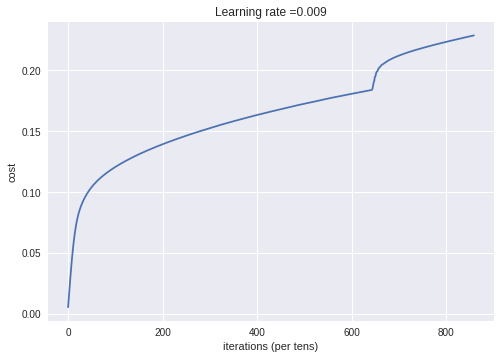

(55000, 10) Z3
(55000, 10) Y_train
Train Accuracy: 0.9881818
Test_accuracy: 0.9881818
0.9881818


In [7]:
n_y = cnn.model(train_data,train_label,test_data,test_label)
print(n_y)

In [10]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
import os
print(os.getcwd())

/content


In [0]:
# with open("/content/textfile1.txt",'w') as f:
#   f.write("Hello Ashwin")

In [6]:
print(os.listdir('/content'))

['datalab', '.forever', '.config', '.keras', 'MNIST-data', '.ipython', '.local', '.cache']


In [33]:

# tf.reset_default_graph()
# saver = tf.train.Saver('alexnet_optimised-model.ckpt.meta')
# with tf.Session() as sess:
#   saver.restore(sess, "/content/alexnet_optimised-model.ckpt.data-00000-of-00001")
#   print("model restored")

Identifying the checkpoint details

In [0]:
# import tensorflow as tf
# from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
# latest_ckp = tf.train.latest_checkpoint('/content/')
# print_tensors_in_checkpoint_file(latest_ckp, all_tensors=True, tensor_name='')

In [11]:
train_data=train_data[108,:]
print(train_data.shape)
print(train_data.shape[0])
n_y = cnn.model_restore_check(train_data)
print(n_y,'something')

(784,)
784
(5, 5, 1, 8) W1 shape
(5, 5, 8, 16) W2 shape
Tensor("Relu:0", shape=(1, 28, 28, 8), dtype=float32) A1
flagged
Tensor("fully_connected/BiasAdd:0", shape=(1, 10), dtype=float32) Z3
INFO:tensorflow:Restoring parameters from /content/alexnet_optimised-model.ckpt
(1, 10) 
 [[ 17.695946  -12.252617   -2.7384522 -10.824662  -11.063417   -4.1631417
   -1.2140809  -5.5373178  -2.277765   -2.0770075]]
Tensor("ArgMax:0", shape=(1,), dtype=int64) something


In [1]:
# [[-22.122187   -9.202263   -1.3403115   5.934069   -1.1212378  -5.8111787
#   -25.835377    9.218367   -8.955311    3.684071 ]]

def image_test(matrix):
  plt.imshow(matrix.reshape(28,28))
  plt.show()
  
image_test(train_data)  

NameError: ignored

DataSet Understanding

In [10]:
len(dataset)

4

In [0]:
train_data=dataset[0]
train_label=dataset[1]
test_data=dataset[2]
test_label=dataset[3]

Verification of the shape of the above dataset

In [12]:
print('train_data:',train_data.shape,'\ntrain_label:',train_label.shape,'\ntest_data:',test_data.shape,'\ntest_label:',test_label.shape) 

train_data: (55000, 784) 
train_label: (55000, 10) 
test_data: (10000, 784) 
test_label: (10000, 10)


Let us try to print the data in the train_data corresponding to the train label as a first come first print

In [0]:
def number_print_demo(train_label):
  number_count=[]
  y_print = []
  for args in range(100,train_label.shape[0]):
    Y=train_label[args,:]
    Y=one_hot_to_normal([Y])
    if len(number_count) == 10:
      break
    else:
      if Y[0] not in y_print:
        number_count.append(args)
        y_print.append(Y[0])

  return number_count,y_print

def display_image(number_count,train_data):
  indx=1
  for index in number_count:
    train_x=train_data[index,:]
    matrix = train_x.reshape(28,28)
    plt.subplot(5,5,indx)
    plt.axis('off')
    indx +=1
    plt.imshow(matrix)
#Converting one hot encoding to decimal    
def one_hot_to_normal(train_label):
  x=[ np.where(r==1)[0][0] for r in train_label]
  return x    

[100, 101, 102, 103, 106, 107, 108, 109, 112, 121] [7, 4, 3, 2, 9, 1, 0, 5, 8, 6]


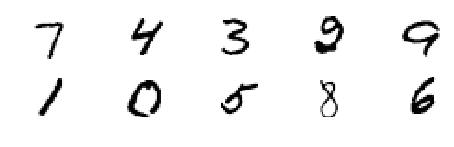

In [14]:
print_list,_=number_print_demo(train_label)
print(print_list,_)
display_image(print_list,train_data)

Let us now try with the shuffled data to understand the shuffle

In [0]:
def random_shuffle(X,Y,seed):
    np.random.seed(seed)
    m=X.shape[0]
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    shuffled_Y = Y[permutation,:]
    return shuffled_X,shuffled_Y

We shall call the same number_print_demo and display_image method

[100, 101, 102, 103, 104, 105, 108, 110, 114, 115] [1, 0, 7, 4, 9, 8, 5, 2, 6, 3]


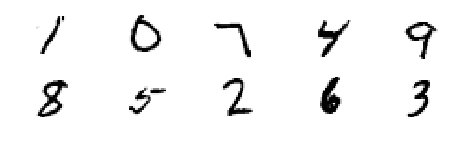

In [20]:
X,Y=random_shuffle(train_data,train_label,25)
print_list,_=number_print_demo(Y)
print(print_list,_)
display_image(print_list,X)

In [42]:
type(train_label[100,:])

numpy.ndarray

In [0]:
def one_hot_test_ravel(Y):
    num_labels = Y.shape[0]
    offset = np.arange(num_labels)*10
    max_Y=np.amax(Y)
    print(max_Y)
    size=Y.shape[0]
    a=np.zeros((size, 10))
    print(a)
    x=offset+Y.ravel()
    print(offset)
    print(Y)
    print(x)
    a.flat[x]=1
    print(a)
    return a
  

In [77]:
input_label=np.arange(0,10)
a=one_hot_test_ravel(input_label)

9
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[ 0 10 20 30 40 50 60 70 80 90]
[0 1 2 3 4 5 6 7 8 9]
[ 0 11 22 33 44 55 66 77 88 99]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:
a.flat[6]=1

In [48]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])